# 1. Joins

Joining dataframes together is a way of combining the columns of two dataframes to create
a new dataframe with some columns from each. In order to do this, the dataframes need to
share at least one column in common. The shared columns are sometimes referred to as
"keys".
To practice joining dataframes together, load up the `planes.csv` and `flights.csv`
datasets, which are sampled from Hadley Wickham's nycflights13 dataset, a dataset
containing information about flights that departed from New York City in 2013.


In [2]:
import pandas as pd
import numpy as np

In [3]:
flights = pd.read_csv('data/flights.csv')
flights.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01T10:00:00Z
1,2013,1,1,635.0,635,0.0,1028.0,940,48.0,AA,711,N3GKAA,LGA,DFW,248.0,1389,6,35,2013-01-01T11:00:00Z
2,2013,1,1,732.0,645,47.0,1011.0,941,30.0,UA,1111,N37456,EWR,MCO,145.0,937,6,45,2013-01-01T11:00:00Z
3,2013,1,1,805.0,805,0.0,1015.0,1005,10.0,B6,219,N273JB,JFK,CLT,98.0,541,8,5,2013-01-01T13:00:00Z
4,2013,1,1,824.0,830,-6.0,1027.0,1025,2.0,AA,1855,N573AA,LGA,STL,169.0,888,8,30,2013-01-01T13:00:00Z


In [4]:
planes = pd.read_csv('data/planes.csv')
planes.head()

,tailnum,year,type,manufacturer,model,engines,seats,speed,engine
0,N10156,2004.0,Fixed wing multi engine,EMBRAER,EMB-145XR,2,55,NaN,Turbo-fan
1,N102UW,1998.0,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-214,2,182,NaN,Turbo-fan
2,N103US,1999.0,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-214,2,182,NaN,Turbo-fan
3,N104UW,1999.0,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-214,2,182,NaN,Turbo-fan
4,N10575,2002.0,Fixed wing multi engine,EMBRAER,EMB-145LR,2,55,NaN,Turbo-fan


In [5]:
flights2 = flights[["dest", "origin", "dep_delay",
                    "arr_delay", "distance", "tailnum"]]

planes2 = planes[["tailnum", "type", "engines"]]

In [6]:
# A Left Join
left_joined = pd.merge(flights2,       # the "left" dataframe
                       planes2,        # the "right" dataframe
                       how='left', 
                       on='tailnum'  # the join key
                       )
left_joined

,dest,origin,dep_delay,arr_delay,distance,tailnum,type,engines
0,IAH,EWR,2.0,11.0,1400,N14228,Fixed wing multi engine,2.0
1,DFW,LGA,0.0,48.0,1389,N3GKAA,NaN,NaN
2,MCO,EWR,47.0,30.0,937,N37456,Fixed wing multi engine,2.0
3,CLT,JFK,0.0,10.0,541,N273JB,Fixed wing multi engine,2.0
4,STL,LGA,-6.0,2.0,888,N573AA,Fixed wing multi engine,2.0
...,...,...,...,...,...,...,...,...
9995,SAN,JFK,-6.0,11.0,2446,N3762Y,Fixed wing multi engine,2.0
9996,FLL,EWR,-4.0,-26.0,1065,N403UA,Fixed wing multi engine,2.0
9997,DEN,LGA,16.0,24.0,1620,N310NW,Fixed wing multi engine,2.0
9998,BOS,JFK,-7.0,-10.0,187,N973DL,Fixed wing multi engine,2.0


In [7]:
left_joined.head()

,dest,origin,dep_delay,arr_delay,distance,tailnum,type,engines
0,IAH,EWR,2.0,11.0,1400,N14228,Fixed wing multi engine,2.0
1,DFW,LGA,0.0,48.0,1389,N3GKAA,NaN,NaN
2,MCO,EWR,47.0,30.0,937,N37456,Fixed wing multi engine,2.0
3,CLT,JFK,0.0,10.0,541,N273JB,Fixed wing multi engine,2.0
4,STL,LGA,-6.0,2.0,888,N573AA,Fixed wing multi engine,2.0


#### Inner and Outer Joins

In [8]:
# An inner join keeps rows that exist in *both* tables, and throws out rows that exist in one but are missing from the other
inner_joined = pd.merge(flights2, planes2, how='inner', on='tailnum')
inner_joined.head()

,dest,origin,dep_delay,arr_delay,distance,tailnum,type,engines
0,IAH,EWR,2.0,11.0,1400,N14228,Fixed wing multi engine,2
1,LAX,EWR,-3.0,3.0,2454,N14228,Fixed wing multi engine,2
2,MCO,EWR,47.0,30.0,937,N37456,Fixed wing multi engine,2
3,SEA,EWR,-1.0,-16.0,2402,N37456,Fixed wing multi engine,2
4,SFO,EWR,10.0,-10.0,2565,N37456,Fixed wing multi engine,2


In [9]:
# An outer join keeps all rows.
outer_joined = pd.merge(flights2, planes2, how='outer', on='tailnum')

In [10]:
inner_joined.head()

,dest,origin,dep_delay,arr_delay,distance,tailnum,type,engines
0,IAH,EWR,2.0,11.0,1400,N14228,Fixed wing multi engine,2
1,LAX,EWR,-3.0,3.0,2454,N14228,Fixed wing multi engine,2
2,MCO,EWR,47.0,30.0,937,N37456,Fixed wing multi engine,2
3,SEA,EWR,-1.0,-16.0,2402,N37456,Fixed wing multi engine,2
4,SFO,EWR,10.0,-10.0,2565,N37456,Fixed wing multi engine,2


In [11]:
outer_joined.head()

,dest,origin,dep_delay,arr_delay,distance,tailnum,type,engines
0,IAH,EWR,2.0,11.0,1400.0,N14228,Fixed wing multi engine,2.0
1,LAX,EWR,-3.0,3.0,2454.0,N14228,Fixed wing multi engine,2.0
2,DFW,LGA,0.0,48.0,1389.0,N3GKAA,NaN,NaN
3,BOS,JFK,17.0,12.0,187.0,N3GKAA,NaN,NaN
4,ORD,JFK,0.0,-11.0,740.0,N3GKAA,NaN,NaN


# 2. Sorting

Pandas provides a number of ways to sort a dataframe.

### 1. Sort by one column

In [12]:
# sort the planes dataset by manufacturer
# the inplace argument says to modify the original dataframe rather than
planes.sort_values('manufacturer', inplace=True)
# output a copy
planes.head()

,tailnum,year,type,manufacturer,model,engines,seats,speed,engine
897,N365AA,2001.0,Rotorcraft,AGUSTA SPA,A109E,2,8,NaN,Turbo-shaft
1660,N559JB,2003.0,Fixed wing multi engine,AIRBUS,A320-232,2,200,NaN,Turbo-fan
1899,N624JB,2005.0,Fixed wing multi engine,AIRBUS,A320-232,2,200,NaN,Turbo-fan
1895,N623VA,2006.0,Fixed wing multi engine,AIRBUS,A320-214,2,182,NaN,Turbo-fan
1893,N623JB,2005.0,Fixed wing multi engine,AIRBUS,A320-232,2,200,NaN,Turbo-fan


### 2. Sort in descending order

In [13]:
# sort the planes dataset by manufacturer, descnding (i.e. Z to A)
# the inplace argument says to modify the original dataframe rather than
planes.sort_values('manufacturer', ascending=False, inplace=True)
# output a copy
planes.head()

,tailnum,year,type,manufacturer,model,engines,seats,speed,engine
1116,N397AA,1985.0,Fixed wing single engine,STEWART MACO,FALCON XP,1,2,NaN,Reciprocating
1489,N521AA,NaN,Fixed wing single engine,STEWART MACO,FALCON-XP,1,2,NaN,Reciprocating
811,N347AA,1985.0,Rotorcraft,SIKORSKY,S-76A,2,14,NaN,Turbo-shaft
1564,N537JB,2012.0,Rotorcraft,ROBINSON HELICOPTER CO,R66,1,5,NaN,Turbo-shaft
1190,N425AA,1968.0,Fixed wing single engine,PIPER,PA-28-180,1,4,107.0,Reciprocating


### 3. Sort by multiple columns

In [14]:
# sort the planes dataset by manufacturer, model, and year
planes.sort_values(['manufacturer', 'model', 'year'], inplace=True)
planes.head()

,tailnum,year,type,manufacturer,model,engines,seats,speed,engine
897,N365AA,2001.0,Rotorcraft,AGUSTA SPA,A109E,2,8,NaN,Turbo-shaft
2964,N910FR,2002.0,Fixed wing multi engine,AIRBUS,A319-112,2,100,NaN,Turbo-fan
3137,N941FR,2005.0,Fixed wing multi engine,AIRBUS,A319-112,2,100,NaN,Turbo-fan
3147,N943FR,2005.0,Fixed wing multi engine,AIRBUS,A319-112,2,100,NaN,Turbo-fan
3169,N948FR,2006.0,Fixed wing multi engine,AIRBUS,A319-112,2,100,NaN,Turbo-fan


If we want to sort by index, there's a special method for that.

In [15]:
planes.sort_index(inplace=True)
planes.head()

,tailnum,year,type,manufacturer,model,engines,seats,speed,engine
0,N10156,2004.0,Fixed wing multi engine,EMBRAER,EMB-145XR,2,55,NaN,Turbo-fan
1,N102UW,1998.0,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-214,2,182,NaN,Turbo-fan
2,N103US,1999.0,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-214,2,182,NaN,Turbo-fan
3,N104UW,1999.0,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-214,2,182,NaN,Turbo-fan
4,N10575,2002.0,Fixed wing multi engine,EMBRAER,EMB-145LR,2,55,NaN,Turbo-fan


Here, the index is not particularly meaningful, so sorting by index isn't really important. But if we had a time series it would be very important.

# 3. Grouping, transforming, and aggregating

A very important pattern in data analysis is the split-apply-combine pattern. Split-apply-combine works as follows

- *Split* a dataframe into groups
- *Apply* transformations to the groups
- *Combine* the transformed groups

This pattern is implemented using the `grouped` dataframe object in Pandas. The block of code creates a `grouped` dataframe out of the `planes` dataset, grouped by `type`.

In [16]:
grouped = planes.groupby('type')
grouped

#### Aggregation

An _aggregating function_ is a function that takes a bunch of values and returns a single number. Some examples include `sum`, `mean`, `len`, etc. An _aggregation_ on a grouped dataframe applies an aggregating function to each group, and returns a dataframe with a single row per group. It is performed with the `.agg` method, which is a type of function that takes a function as its argument.

In [17]:
grouped.agg(len)

,tailnum,year,manufacturer,model,engines,seats,speed,engine
type,,,,,,,,
Fixed wing multi engine,3292,3292,3292,3292,3292,3292,3292,3292
Fixed wing single engine,25,25,25,25,25,25,25,25
Rotorcraft,5,5,5,5,5,5,5,5


Note that this applied the `len` function to each column, by group. We can also perform selections on a grouped dataframe.

In [18]:
grouped['tailnum'].agg(len)

type
Fixed wing multi engine     3292
Fixed wing single engine      25
Rotorcraft                     5
Name: tailnum, dtype: int64

This last operation is so common that it is implemented as its own method on grouped dataframes:

In [19]:
grouped.size()

type
Fixed wing multi engine     3292
Fixed wing single engine      25
Rotorcraft                     5
dtype: int64

You can write your own functions for aggregations and pass them to `.agg`.

In [20]:
def my_agg_fun(series):
    if any(series > 2):
        return "sometimes over 2"
    else:
        return "never over 2"

In [21]:
grouped[['engines', 'seats']].agg(my_agg_fun)

,engines,seats
type,,
Fixed wing multi engine,sometimes over 2,sometimes over 2
Fixed wing single engine,never over 2,sometimes over 2
Rotorcraft,never over 2,sometimes over 2


You can apply multiple aggregating functions at the same time by passing a list of functions.

In [22]:
grouped['engines'].agg([min, max, my_agg_fun, np.mean])

C:\Users\hp\AppData\Local\Temp\ipykernel_16192\267137709.py:1: FutureWarning: The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  grouped['engines'].agg([min, max, my_agg_fun, np.mean])
C:\Users\hp\AppData\Local\Temp\ipykernel_16192\267137709.py:1: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  grouped['engines'].agg([min, max, my_agg_fun, np.mean])
C:\Users\hp\AppData\Local\Temp\ipykernel_16192\267137709.py:1: FutureWarning: The provided callable <function mean at 0x00000298920D8900> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "m

,min,max,my_agg_fun,mean
type,,,,
Fixed wing multi engine,2,4,sometimes over 2,2.003341
Fixed wing single engine,1,1,never over 2,1.000000
Rotorcraft,1,2,never over 2,1.600000


#### Transformation

Sometimes you prefer to have a return value that is on the same index as the original data, rather than one row per group. This is done with the `transform` method.

In [23]:
def standardize(series):
    return (series - series.mean())/series.std()


planes['seats_std'] = grouped['seats'].transform(standardize)
planes.head()

,tailnum,year,type,manufacturer,model,engines,seats,speed,engine,seats_std
0,N10156,2004.0,Fixed wing multi engine,EMBRAER,EMB-145XR,2,55,NaN,Turbo-fan,-1.387173
1,N102UW,1998.0,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-214,2,182,NaN,Turbo-fan,0.362609
2,N103US,1999.0,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-214,2,182,NaN,Turbo-fan,0.362609
3,N104UW,1999.0,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-214,2,182,NaN,Turbo-fan,0.362609
4,N10575,2002.0,Fixed wing multi engine,EMBRAER,EMB-145LR,2,55,NaN,Turbo-fan,-1.387173


# 4. Time Series Data

Time series data refers to any dataset such that each row is assigned a date or datetime stamp. In this section, we'll learn about the `datetime` objects in Pandas and the following topics:
* Generating datetime ranges.
* Creating / loading data sets that have datetime indices.
* Resampling time-series data.

The main way to create a sequence of datetimes is to use the ```pd.date_range()``` function.  At minimum, you must specify the following arguments to create a date_range:
1. ```start```, to say when the sequence will begin.
2. ```end``` *or* ```periods```, providing either a specific end, or the number of periods from the ```start```.
3. ```freq```, the frequency of the times.  The default is ```'D'``` for calendar daily, but other options include ```'M'``` for monthly, ```'Y'``` for yearly, ```'H'``` for hourly, ```'T'``` or ```'min'``` for minutely, and ```'s'``` for secondly.

Here are two examples:

In [24]:
dates = pd.date_range('1/1/2014', periods=28, freq='H')
dates

DatetimeIndex(['2014-01-01 00:00:00', '2014-01-01 01:00:00',
               '2014-01-01 02:00:00', '2014-01-01 03:00:00',
               '2014-01-01 04:00:00', '2014-01-01 05:00:00',
               '2014-01-01 06:00:00', '2014-01-01 07:00:00',
               '2014-01-01 08:00:00', '2014-01-01 09:00:00',
               '2014-01-01 10:00:00', '2014-01-01 11:00:00',
               '2014-01-01 12:00:00', '2014-01-01 13:00:00',
               '2014-01-01 14:00:00', '2014-01-01 15:00:00',
               '2014-01-01 16:00:00', '2014-01-01 17:00:00',
               '2014-01-01 18:00:00', '2014-01-01 19:00:00',
               '2014-01-01 20:00:00', '2014-01-01 21:00:00',
               '2014-01-01 22:00:00', '2014-01-01 23:00:00',
               '2014-01-02 00:00:00', '2014-01-02 01:00:00',
               '2014-01-02 02:00:00', '2014-01-02 03:00:00'],
              dtype='datetime64[ns]', freq='H')

In [25]:
dates2 = pd.date_range('2015-02-05', '2015-02-14', freq='D')
dates2

DatetimeIndex(['2015-02-05', '2015-02-06', '2015-02-07', '2015-02-08',
               '2015-02-09', '2015-02-10', '2015-02-11', '2015-02-12',
               '2015-02-13', '2015-02-14'],
              dtype='datetime64[ns]', freq='D')

Let's create a dataframe now using a smaller version of the ```dates``` object above as its index.  We'll make it with three columns of random integers, representing hourly stock price changes, starting at 8:00:00 and going until 16:00 on June 1st 2014.  First, let's create that date range:

In [26]:
dates3 = pd.date_range('2014-06-01 08:00:00', '2014-06-01 16:00:00', freq='H')

In [27]:
dft = pd.DataFrame(np.random.randint(-100, 100, size=(9, 3)), columns=['Stock 1', 'Stock 2', 'Stock 3'],
                   index=dates3)
dft

,Stock 1,Stock 2,Stock 3
2014-06-01 08:00:00,-10,-44,3
2014-06-01 09:00:00,73,-21,-100
2014-06-01 10:00:00,-17,51,-96
2014-06-01 11:00:00,-52,68,-34
2014-06-01 12:00:00,-85,-37,-23
2014-06-01 13:00:00,99,59,12
2014-06-01 14:00:00,-59,-68,-99
2014-06-01 15:00:00,95,-26,-74
2014-06-01 16:00:00,-20,11,-85


We can slice along rows using the same syntax as before, feeding the timestamps as strings:

In [28]:
dft['2014-06-01 10:00:00':'2014-06-01 13:00:00']

,Stock 1,Stock 2,Stock 3
2014-06-01 10:00:00,-17,51,-96
2014-06-01 11:00:00,-52,68,-34
2014-06-01 12:00:00,-85,-37,-23
2014-06-01 13:00:00,99,59,12


In [29]:
dft.loc['2014-06-01 10:00:00':'2014-06-01 11:00:00', ['Stock 1', 'Stock 3']]

,Stock 1,Stock 3
2014-06-01 10:00:00,-17,-96
2014-06-01 11:00:00,-52,-34


### Re-sampling Time-Series Data

Re-sampling data is a method of scaling the time index and obtaining some kind of insight about the data along the times scaled.  For example, with our stock data in ```dft```, we may wish to know what the mean price is over two-hour periods.  The syntax for re-sampling has changed recently in Pandas, and now has the following format:

```dataframe.resample(timeperiod).agg(instructions)```

So the average price in two-hour periods of our stocks can be obtained by:

In [30]:
dft.resample('2H').agg('mean')

,Stock 1,Stock 2,Stock 3
2014-06-01 08:00:00,31.5,-32.5,-48.5
2014-06-01 10:00:00,-34.5,59.5,-65.0
2014-06-01 12:00:00,7.0,11.0,-5.5
2014-06-01 14:00:00,18.0,-47.0,-86.5
2014-06-01 16:00:00,-20.0,11.0,-85.0


And the sum of the price changes over four hour periods is given by:

In [31]:
dft.resample('4H').agg('sum')

,Stock 1,Stock 2,Stock 3
2014-06-01 08:00:00,-6,54,-227
2014-06-01 12:00:00,50,-72,-184
2014-06-01 16:00:00,-20,11,-85


One of the common methods of re-sampling time-series data happens in finance.  When given a list of all possible transaction prices ("tick data"), or a high-frequency set of prices (e.g., second-data), one may want to condense the data into an overview at a longer time period.  The usual way of accomplishing this is to re-sample the prices to the first, maximum, minimum, and last price for each longer period (known as "open-high-low-close" format).  Let's produce a set of prices at the one-second level to start.

In [32]:
date_seconds = pd.date_range(
    '2017-01-01 09:30:00', '2017-01-01 10:00:00', freq='S')

df_p = pd.DataFrame(
    data=np.random.randint(540, 555, size=len(date_seconds)),
    columns=['Price'],
    index=date_seconds
)

In [33]:
df_p

,Price
2017-01-01 09:30:00,549
2017-01-01 09:30:01,540
2017-01-01 09:30:02,546
2017-01-01 09:30:03,550
2017-01-01 09:30:04,552
...,...
2017-01-01 09:59:56,553
2017-01-01 09:59:57,554
2017-01-01 09:59:58,549
2017-01-01 09:59:59,548


Now, we'll follow the same resampling syntax as above to move to the one-minute level, but in the ```.agg()``` section we will provide it with a list of what we want.  Luckily, Python understands words like "first", "max", etc., in this context.

In [34]:
df_minutes = df_p.resample('1min').agg(['first', 'max', 'min', 'last'])
df_minutes.head(10)

Price               
                    first  max  min last
2017-01-01 09:30:00   549  554  540  544
2017-01-01 09:31:00   540  554  540  542
2017-01-01 09:32:00   554  554  540  548
2017-01-01 09:33:00   548  554  540  543
2017-01-01 09:34:00   542  554  540  540
2017-01-01 09:35:00   549  554  540  545
2017-01-01 09:36:00   552  554  540  547
2017-01-01 09:37:00   548  554  540  552
2017-01-01 09:38:00   550  554  540  549
2017-01-01 09:39:00   551  554  540  541

If we wanted to keep this more in line with finance conventions, we could rename the columns:

In [35]:
df_minutes.columns = ['open', 'high', 'low', 'close']
df_minutes.head()

,open,high,low,close
2017-01-01 09:30:00,549,554,540,544
2017-01-01 09:31:00,540,554,540,542
2017-01-01 09:32:00,554,554,540,548
2017-01-01 09:33:00,548,554,540,543
2017-01-01 09:34:00,542,554,540,540


If we wanted to find the times where the price increased at the second level in ```df_p```, how would we accomplish this?

In [36]:
df_seconds = df_p.resample('1s').agg(['first', 'max', 'min', 'last'])
df_seconds.head(10)

Price               
                    first  max  min last
2017-01-01 09:30:00   549  549  549  549
2017-01-01 09:30:01   540  540  540  540
2017-01-01 09:30:02   546  546  546  546
2017-01-01 09:30:03   550  550  550  550
2017-01-01 09:30:04   552  552  552  552
2017-01-01 09:30:05   548  548  548  548
2017-01-01 09:30:06   553  553  553  553
2017-01-01 09:30:07   546  546  546  546
2017-01-01 09:30:08   547  547  547  547
2017-01-01 09:30:09   547  547  547  547

How could we find the times where the price increased at the minute level in ```df_minutes```?

In [37]:
df_seconds = df_p.resample('1min').agg(['first', 'max', 'min', 'last'])
df_seconds.head(10)

Price               
                    first  max  min last
2017-01-01 09:30:00   549  554  540  544
2017-01-01 09:31:00   540  554  540  542
2017-01-01 09:32:00   554  554  540  548
2017-01-01 09:33:00   548  554  540  543
2017-01-01 09:34:00   542  554  540  540
2017-01-01 09:35:00   549  554  540  545
2017-01-01 09:36:00   552  554  540  547
2017-01-01 09:37:00   548  554  540  552
2017-01-01 09:38:00   550  554  540  549
2017-01-01 09:39:00   551  554  540  541

Now, let's resample our minute data data again.  We'll try to find out some statistics about the open prices, by resampling to 5 minute data and finding the mean and max.

# 5. Data Visualization

A data visualization is _mapping_ _units_ and _variables_ (quantitative information) to _marks_ and _channels_ to create a visual representation.

*Note:* we are only going to talk about visualizing tabular data (i.e. a spreadsheet, a table, etc.). There are other kinds of data that can be visualized: networks, fields, hypercubes, and all kinds of other things. The general principles that we discuss here apply to those as well, but we may need to adjust our definition to be more general.

### Units and Variables
If you've got a dataset that is formatted properly, each row of your dataset is a group of measurements or observations of a single _thing_. We'll call these _things_ _units_, and the observations or measurements _variables_. Let's load up a dataset to make this concrete.


### Marks and Channels

Marks and channels are the elements of the visual space that are used to represent our data. A mark is the visual analogue of a unit: it is a visual object that our visual perception picks out as an individual. A channel is the visual analogue of a variable: it is a way that a mark can vary.

**Some Common Marks**
- Points
- Lines
- Geometric shapes
- Curves

**Some Common Channels**
- Vertical position
- Horizontal position
- Length
- Width
- Angle
- Orientation
- Area
- Curvature
- Shape
- Hue
- Saturation
- Transparency
- Texture
- Connectedness
- Containment

Neither of these lists is exhaustive.

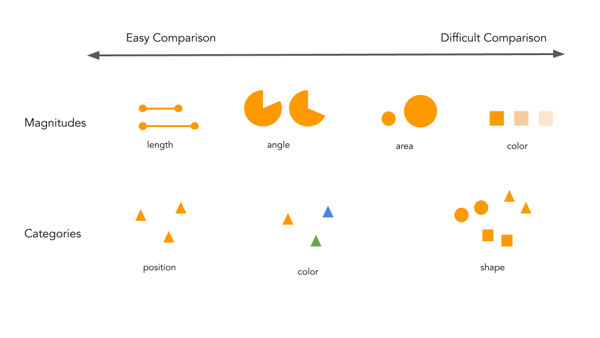

Lets load a small data set to demonstrate the above concepts. This dataset contains 10,000 diamond measurements, as well as the price for each diamond. You can learn more about this dataset [here](https://ggplot2.tidyverse.org/reference/diamonds.html).


**Units:** individual diamonds

**Variables:** carat, cut, color, clarity, depth, table, price, x, y, z

In [38]:
diamonds = pd.read_csv('data/diamonds.csv')

In [39]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.70,Premium,J,VS2,61.2,60.0,1940,5.73,5.70,3.50
1,1.02,Good,I,SI1,64.2,53.0,3998,6.30,6.26,4.03
2,1.07,Ideal,H,SI1,62.0,57.0,4918,6.56,6.51,4.05
3,1.20,Very Good,G,SI2,62.6,60.0,5116,6.68,6.74,4.20
4,0.34,Very Good,E,SI1,60.3,57.0,596,4.53,4.56,2.74


## Matplotlib

Matplotlib was started by John Hunter, a neurobiologist who wanted to port the plotting ability of Matlab to Python. He was a famously welcoming member of the Python community, leading to the creation of the pydata and numfocus organization, which we have to thank for the open source data science stack today.

Our first step will be to import matplotlib, then we tell it how large a picture to show:

In [40]:
import matplotlib.pyplot as plt

In [41]:
plt.rcParams['figure.figsize'] = (8.0, 6.0)  # setting default figure size for the notebook

The basic structure of a Matplotlib plot is

    plt.figure()
    plt.graph_type_of_choice(____________)
    plt.show()


- `plt.figure` sets up a figure object
- `plt.graph_type_of_choice` determines the type of plot we are creating and takes in the data needed, (often DataFrame columns).
- `plt.show` shows the figure on screen

### Scatterplots

A scatterplot is a mapping of the data onto points, with one (usually continuous) variable mapped to the horizontal position, and another (usually continuous) variable mapped to the vertical position.

A useful convention is that in cases where there is a notion of an independent variable and a dependent variable, independent variables are mapped to the _horizontal position_ channel while dependent variables are mapped to the _vertical position_ channel.

The general matplotlib syntax for a scatterplot is:

    plt.figure()
    plt.scatter( x_data, y_data )
    plt.show()

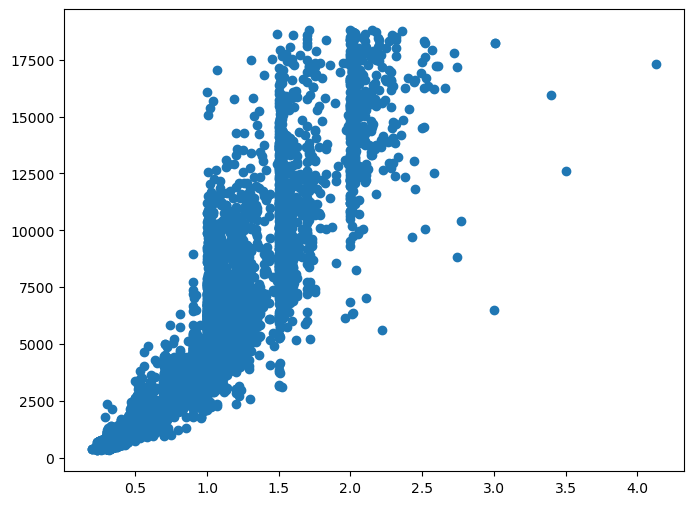

In [42]:
plt.figure()
plt.scatter(diamonds['carat'], diamonds['price'])
plt.show()

Now let's add some axis labels and a title:

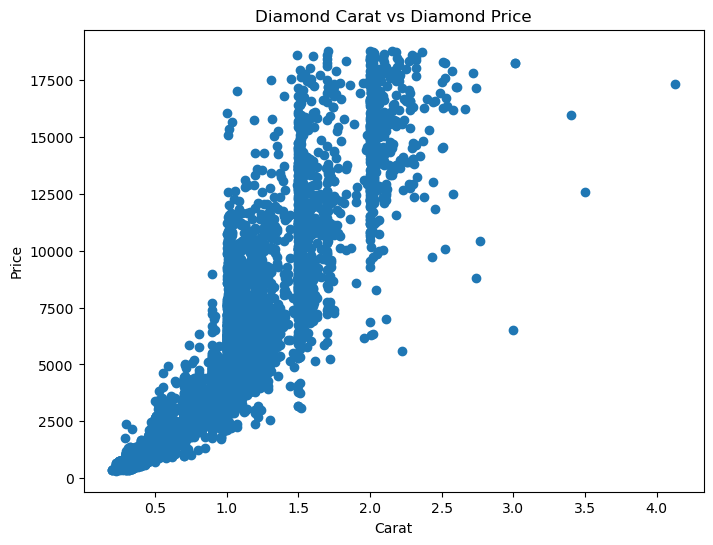

In [43]:
plt.figure()
plt.scatter(diamonds['carat'], diamonds['price'])
plt.xlabel('Carat')
plt.ylabel('Price')
plt.title('Diamond Carat vs Diamond Price')
plt.show()

We can change the size and transparency of the points with `s` and `alpha`, respectively.

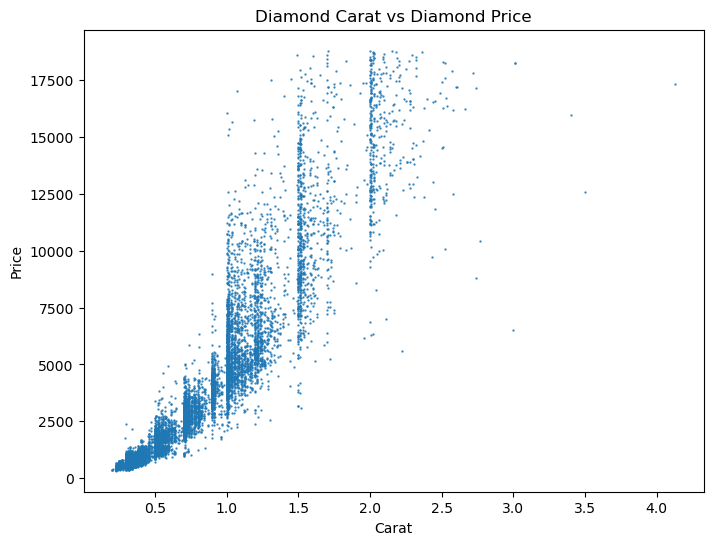

In [44]:
plt.figure()
plt.scatter(diamonds['carat'], diamonds['price'],
            s=0.5, alpha=0.8)
plt.xlabel('Carat')
plt.ylabel('Price')
plt.title('Diamond Carat vs Diamond Price')
plt.show()

What does this plot tell you about the relationship between price and size?

### Bar Plots

A bar plot maps units onto rectangles. A discrete variable is mapped onto the horizontal position of the base of the rectangle, and a continuous variable is mapped onto the height of the rectangle. In order to use a bar plot, it must be the case that for each value of the discrete variable, there is only one value of the continuous variable. This suggests that you'll usually need to do some kind of split-apply-combine operation to create a bar plot.

In [45]:
# Get the number of diamonds, grouped by 'color' category
counts = diamonds.groupby('color')['price'].agg(len)
counts.name = 'count'

counts

color
D    1257
E    1789
F    1815
G    2116
H    1509
I     998
J     516
Name: count, dtype: int64

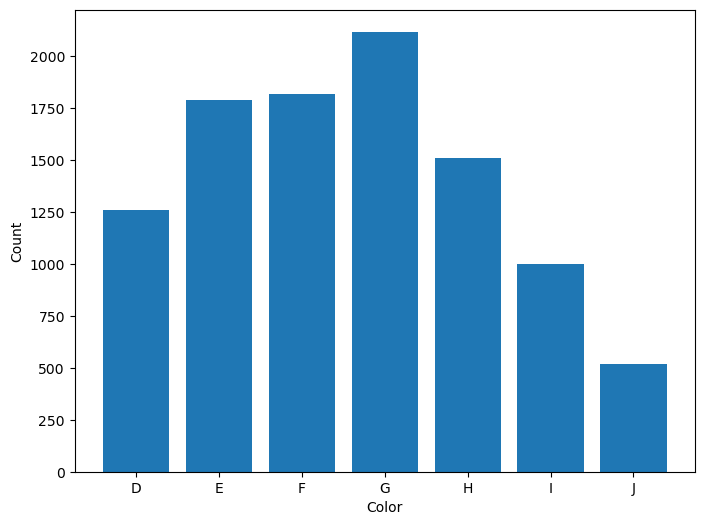

In [46]:
plt.figure()
plt.bar(counts.index, counts)
plt.xlabel('Color')
plt.ylabel('Count')
plt.show()

Pandas has its own integration with matplotlib through the `.plot()` method or Series and DataFrame objects.

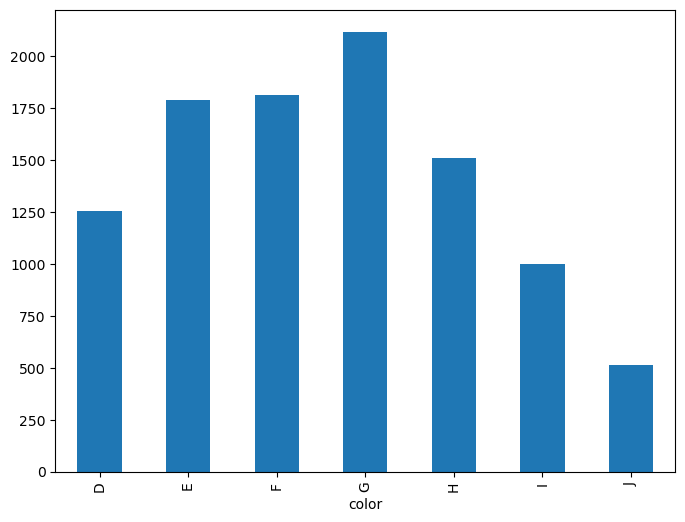

In [47]:
# the default plot is a line chart so we need to specify kind="bar" or "barh"
counts.plot(kind="bar")
plt.show()

### Histograms

A histogram is a way of visualizing the entire distribution of a continuous variable in your dataset. Histograms are created by forming some number of equal width buckets such that each observation fits into exactly one bucket. A bar chart is then formed based of of counts of the buckets, producing the distribution visualization.

Histograms are implemented in matplotlib with the `plt.hist()` function:

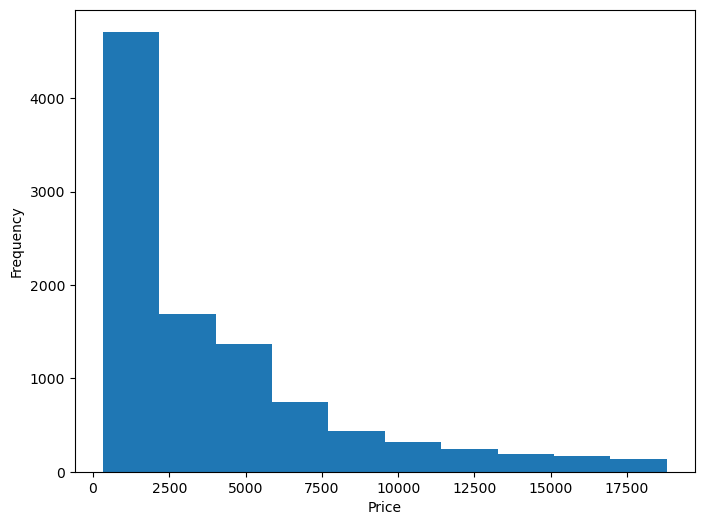

In [48]:
plt.figure()
plt.hist(diamonds['price'])
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

We can adjust the granularity of a matplotlib histogram with the `bins` argument.

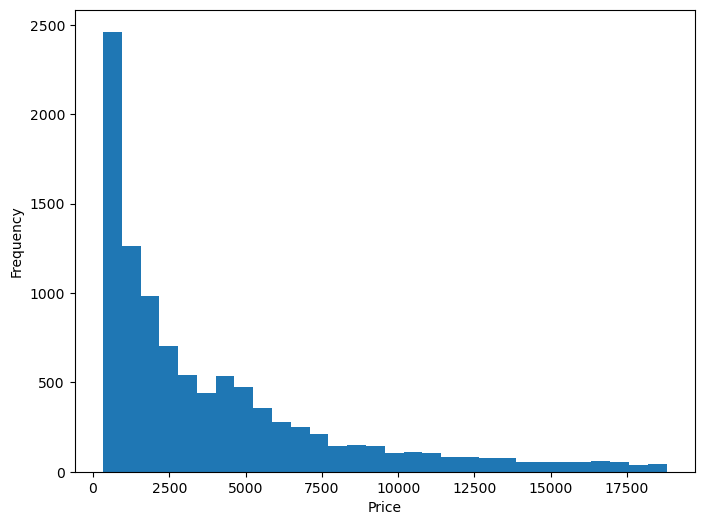

In [49]:
plt.figure()
plt.hist(diamonds['price'], bins=30)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

As before, we can use Pandas methods to achieve this too:

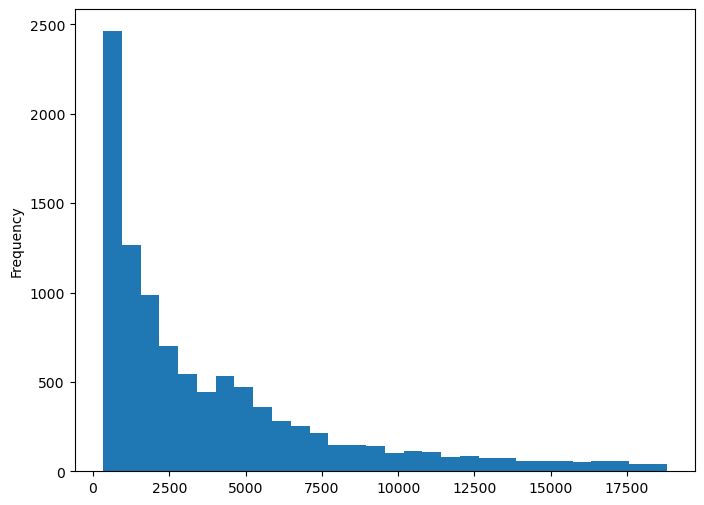

In [50]:
diamonds['price'].plot(kind="hist", bins=30);

### Line Plots

A line plot is a scatterplot with an additional mapping: _consecutiveness_ is mapped to _connectedness_. That is to say, when units appear _consecutively_ in the dataset, their corresponding marks will be _connected_. The most typical way to connect consecutive points is with a line segment.

*Question:* is there anywhere where it makes sense to use a line plot with the diamonds dataset?

#### Time Series

Let's load up our economic indicators time series.

In [52]:
cpi = pd.read_csv('data/canada_cpi.csv', parse_dates=[0], index_col=0)
cpi.head()

,Total CPI,Total CPI S.A.,Core CPI,% Change 1 Yr: Total CPI,% Change 1 Yr: Core CPI,% Change 1 Yr: CPI-XFET,% Change 1 Yr: CPIW
Month,,,,,,,
2018-06-30,133.6,133.0,2.5,2.0,2.0,1.9,1.3
2018-05-31,133.4,132.9,2.2,1.9,2.0,1.9,1.3
2018-04-30,133.3,132.8,2.2,2.1,2.0,1.9,1.5
2018-03-31,132.9,132.7,2.3,2.0,2.0,1.9,1.4
2018-02-28,132.5,132.6,2.2,2.1,2.0,1.9,1.5


Lineplots can be created with `plt.plot()` in `matplotlib`, but time series plotting is actually something that is really nicely executed in `pandas` too.

<Axes: xlabel='Month'>

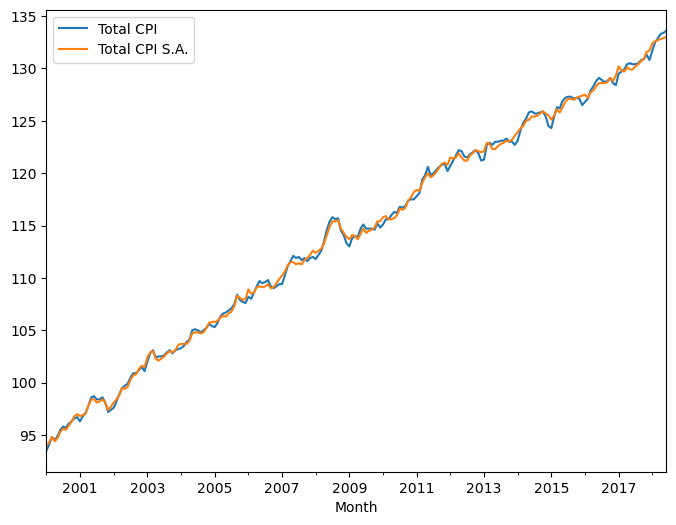

In [53]:
cpi[['Total CPI', 'Total CPI S.A.']].plot()

Let's create the same plot using `matplotlib`:

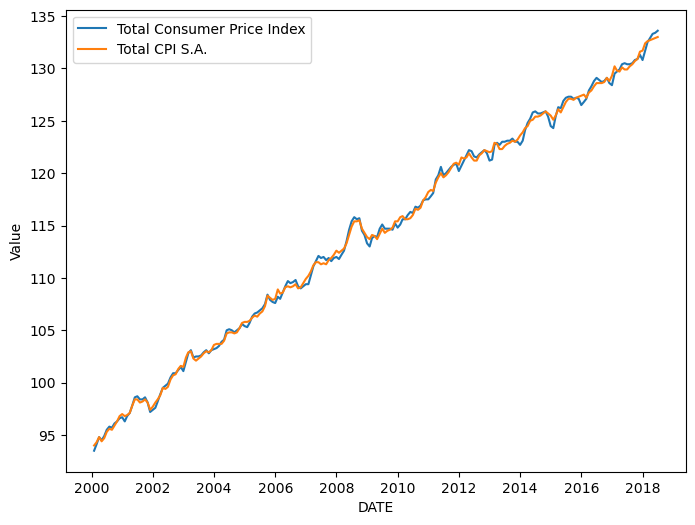

In [54]:
plt.figure()
plt.plot(cpi['Total CPI'], label='Total Consumer Price Index')
plt.plot(cpi['Total CPI S.A.'], label='Total CPI S.A.')
plt.xlabel('DATE')
plt.ylabel('Value')
plt.legend()
plt.show()

This plot shows the Total CPI and Seasonally Adjusted CPI in the U.S. from 2012 to 2021. It's clear that they are very closely correlated--we can verify this by looking at a scatterplot instead.

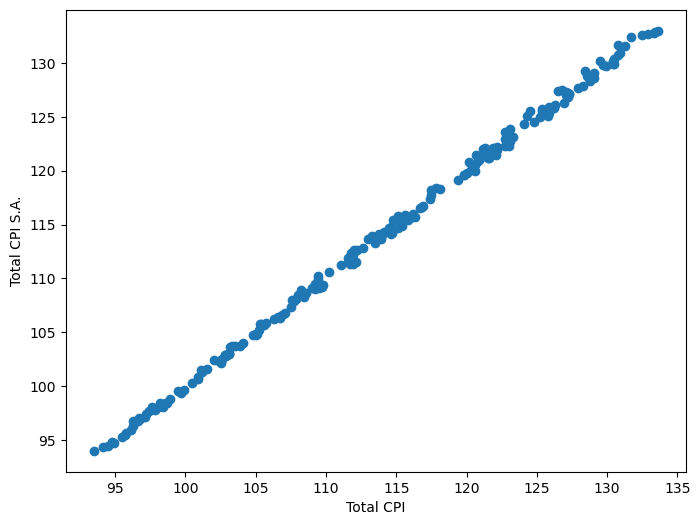

In [55]:
plt.scatter(cpi['Total CPI'], cpi['Total CPI S.A.'])
plt.xlabel('Total CPI')
plt.ylabel('Total CPI S.A.')
plt.show()

Line plots only make sense when there is some kind of semantic meaning to the ordering of entries in the dataset--in particular, it should be the case that there is significance to consecutiveness. In the diamonds dataset, the order does not have any meaning, and so we will get weird results from a line plot.

<Axes: >

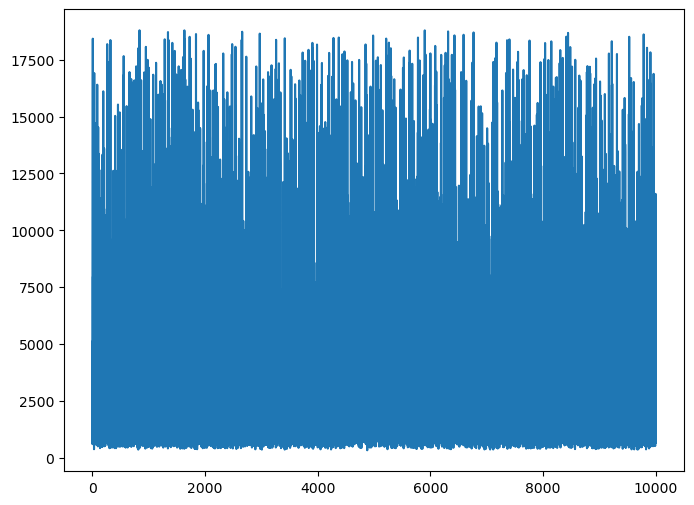

In [56]:
diamonds['price'].plot()

Caution: When plotting multiple line plots on the same plot, if they are on different scales, the larger one can "squash" the smaller one.

<Axes: xlabel='Month'>

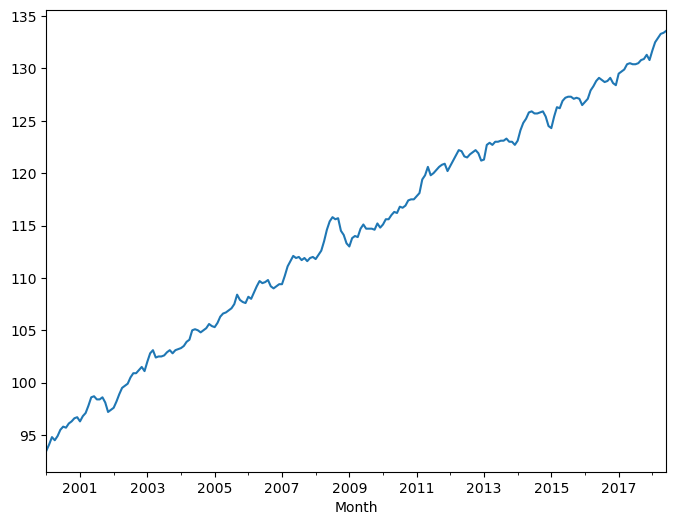

In [57]:
cpi['Total CPI'].plot()

<Axes: xlabel='Month'>

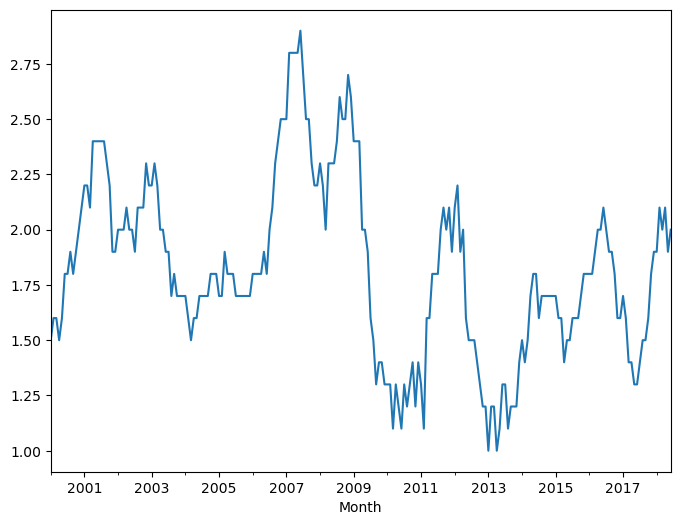

In [58]:
cpi['% Change 1 Yr: Total CPI'].plot()

<Axes: xlabel='Month'>

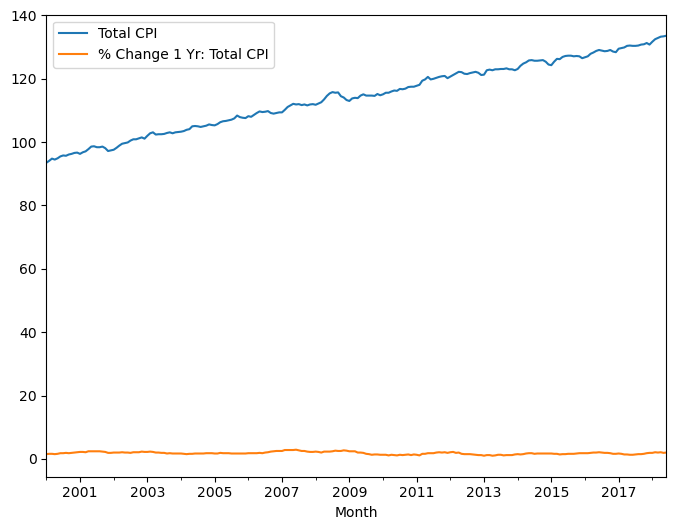

In [59]:
cpi[['Total CPI', '% Change 1 Yr: Total CPI']].plot()

## Charts in Seaborn

The Seaborn package is built on top of Matplotlib providing an easy-to-use interface for drawing statistical charts. So we can still use Matplotlib commands (like `plt.show`) when creating Seaborn viusalizations.

In [60]:
import seaborn as sns

sns.set_style('whitegrid') # setting the default style of plots for the notebook



The basic structure of a Seaborn plot is:

    sns.graph_type_of_choice(data = your_data_frame,
                             x = column_name_of_x_variable,
                             y = column_name_of_y_variable)
    plt.show()
    


Let's recreate some of the visuals from our matplotlib exploration in seaborn.

### Scatter Plots

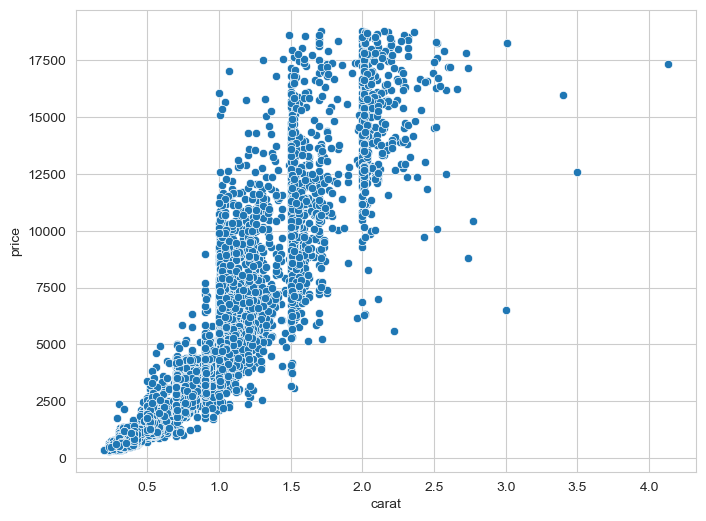

In [61]:
# Scatterplot in Seaborn
plt.figure(figsize=(8, 6))
sns.scatterplot(data=diamonds, x='carat', y='price')
plt.show()

Seaborn makes it very easy to add more information into a scatterplot. The main way is by adding another mapping from another variable to another channel. Let's add a mapping from the `clarity` variable to `hue`:

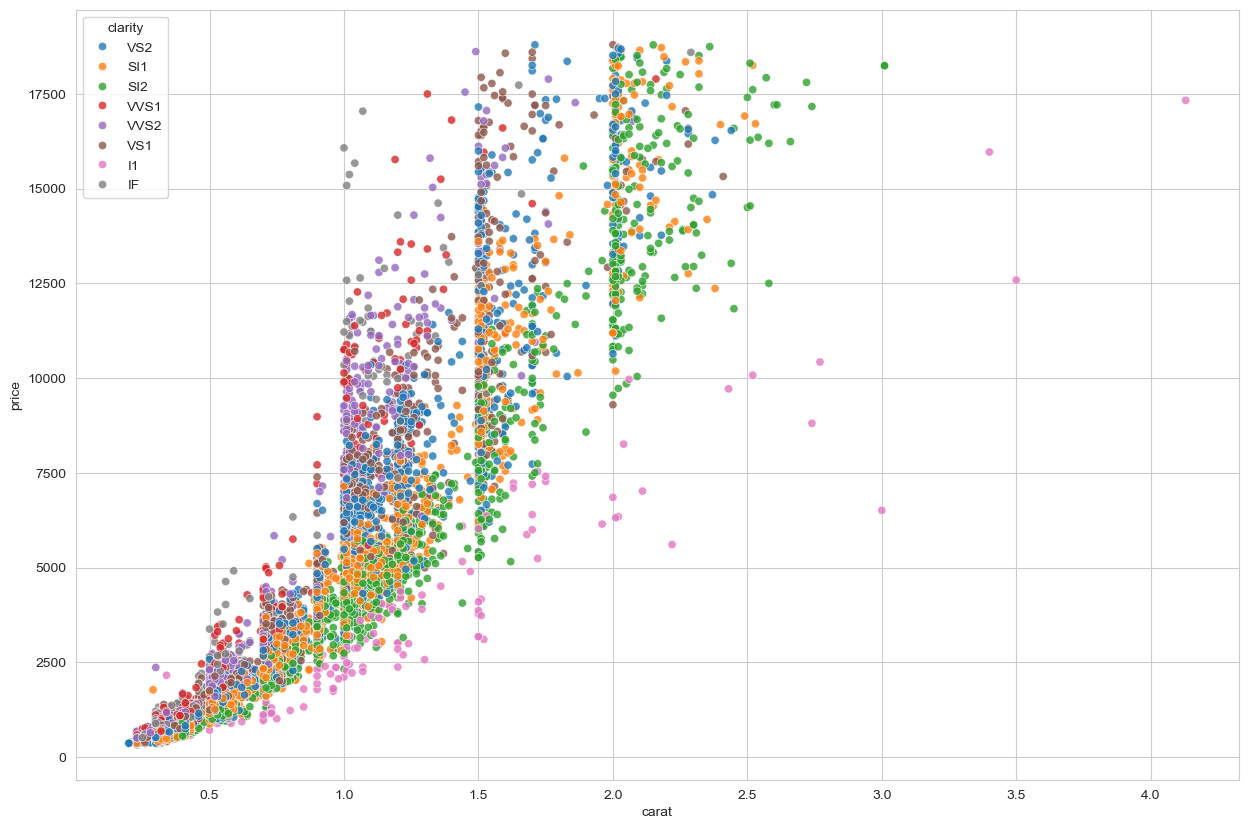

In [62]:
plt.figure(figsize=(15, 10))
sns.scatterplot(data=diamonds, x='carat', y='price', hue='clarity', alpha=0.8)
plt.show()
# lowering alpha makes points slightly more transparent

We can just keep adding mappings onto the scatterplot, but at a certain point it can become hard to tell what's going on. Do we learn anything from the following chart?

### Scatter Matrices
A scatter matrix is a matrix of scatterplots, visualizing up to every pair of columns from your data as a scatterplot. The scatter matrix maps pairs of columns to canvases. These visualizations are useful enough that it is implemented in seaborn as its own function.

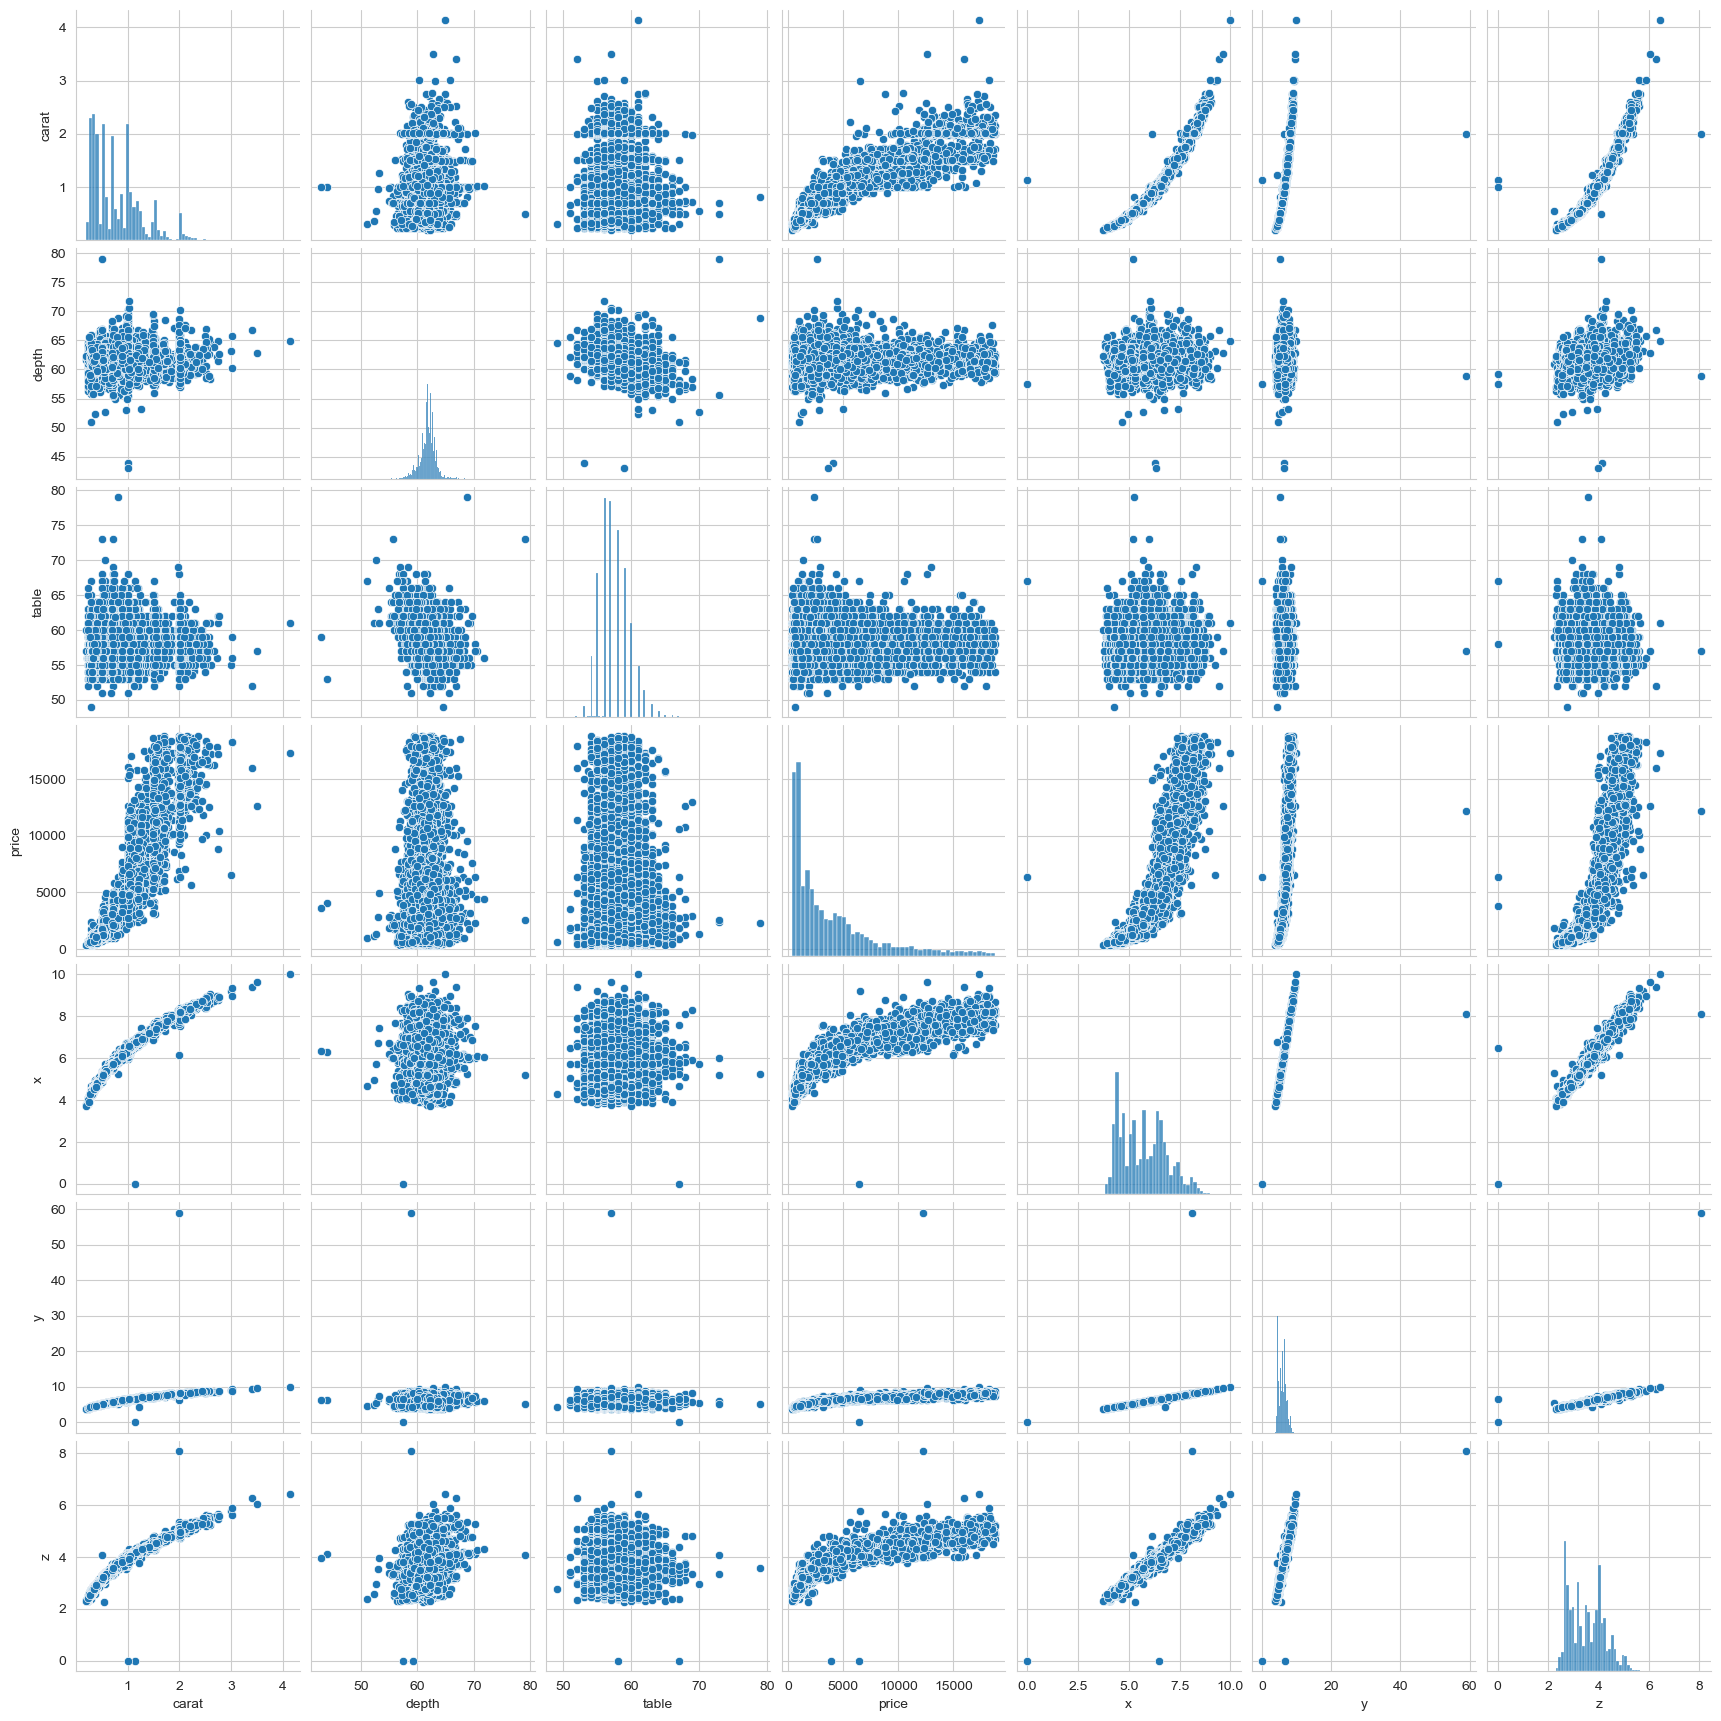

In [63]:
sns.pairplot(diamonds)
plt.show()

You can create your own custom visualizations with side-by-side charts and grids: for this, use the `plt.subplots()` function - more information can be found [here](https://matplotlib.org/stable/tutorials/intermediate/arranging_axes.html).